## Introduction

Fachmi Maris

### Problem Statement 
> Shipping and Stock Performance Review on Q1 - Q2 2023


## Import Library

In [1]:
# Define Libraries
import pandas as pd
import numpy as np
from scipy import stats
import pickle
from sklearn import set_config

# For plotting
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline

## Data Loading

In [2]:
df =  pd.read_csv('orders items q1-q2.csv', low_memory=False)

In [3]:
df

,id,order_id,user_id,product_id,inventory_item_id,status,created_at,shipped_at,delivered_at,returned_at,sale_price
0,582,393,287,13606,1578,Shipped,2023-02-05 08:08:51 UTC,2023-02-05 21:04:00 UTC,NaN,NaN,2.50
1,1366,958,770,13606,3722,Complete,2023-04-10 14:38:35 UTC,2023-04-11 23:33:00 UTC,2023-04-13 16:35:00 UTC,NaN,2.50
2,331,218,152,13606,874,Processing,2023-06-03 23:23:16 UTC,NaN,NaN,NaN,2.50
3,144885,99909,80197,13606,391108,Processing,2023-01-28 10:26:25 UTC,NaN,NaN,NaN,2.50
4,33220,23094,18368,28951,89748,Complete,2023-01-08 03:33:34 UTC,2023-01-06 14:41:00 UTC,2023-01-10 10:32:00 UTC,NaN,3.00
...,...,...,...,...,...,...,...,...,...,...,...
62511,125239,86455,69452,146,337935,Shipped,2023-02-15 05:43:31 UTC,2023-02-15 23:02:00 UTC,NaN,NaN,9.32
62512,23655,16492,13006,146,63864,Complete,2023-04-04 04:48:59 UTC,2023-04-04 06:58:00 UTC,2023-04-05 02:20:00 UTC,NaN,9.32
62513,95919,66298,53125,146,258859,Complete,2023-05-24 04:45:25 UTC,2023-05-26 04:23:00 UTC,2023-05-27 21:11:00 UTC,NaN,9.32
62514,82243,56855,45478,3633,221966,Returned,2023-04-04 10:49:04 UTC,2023-04-06 05:24:00 UTC,2023-04-07 16:58:00 UTC,2023-04-08 00:38:00 UTC,9.32


In [4]:
df.head()

,id,order_id,user_id,product_id,inventory_item_id,status,created_at,shipped_at,delivered_at,returned_at,sale_price
0,582,393,287,13606,1578,Shipped,2023-02-05 08:08:51 UTC,2023-02-05 21:04:00 UTC,NaN,NaN,2.5
1,1366,958,770,13606,3722,Complete,2023-04-10 14:38:35 UTC,2023-04-11 23:33:00 UTC,2023-04-13 16:35:00 UTC,NaN,2.5
2,331,218,152,13606,874,Processing,2023-06-03 23:23:16 UTC,NaN,NaN,NaN,2.5
3,144885,99909,80197,13606,391108,Processing,2023-01-28 10:26:25 UTC,NaN,NaN,NaN,2.5
4,33220,23094,18368,28951,89748,Complete,2023-01-08 03:33:34 UTC,2023-01-06 14:41:00 UTC,2023-01-10 10:32:00 UTC,NaN,3.0


In [5]:
df.tail()

,id,order_id,user_id,product_id,inventory_item_id,status,created_at,shipped_at,delivered_at,returned_at,sale_price
62511,125239,86455,69452,146,337935,Shipped,2023-02-15 05:43:31 UTC,2023-02-15 23:02:00 UTC,NaN,NaN,9.32
62512,23655,16492,13006,146,63864,Complete,2023-04-04 04:48:59 UTC,2023-04-04 06:58:00 UTC,2023-04-05 02:20:00 UTC,NaN,9.32
62513,95919,66298,53125,146,258859,Complete,2023-05-24 04:45:25 UTC,2023-05-26 04:23:00 UTC,2023-05-27 21:11:00 UTC,NaN,9.32
62514,82243,56855,45478,3633,221966,Returned,2023-04-04 10:49:04 UTC,2023-04-06 05:24:00 UTC,2023-04-07 16:58:00 UTC,2023-04-08 00:38:00 UTC,9.32
62515,174091,119901,96249,3633,470023,Cancelled,2023-01-05 05:40:15 UTC,NaN,NaN,NaN,9.32


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62516 entries, 0 to 62515
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 62516 non-null  int64  
 1   order_id           62516 non-null  int64  
 2   user_id            62516 non-null  int64  
 3   product_id         62516 non-null  int64  
 4   inventory_item_id  62516 non-null  int64  
 5   status             62516 non-null  object 
 6   created_at         62516 non-null  object 
 7   shipped_at         40661 non-null  object 
 8   delivered_at       22034 non-null  object 
 9   returned_at        6285 non-null   object 
 10  sale_price         62516 non-null  float64
dtypes: float64(1), int64(5), object(5)
memory usage: 5.2+ MB


In [7]:
df[df.duplicated()].shape

(0, 11)

In [8]:
#Check Missing Values
df.isnull().sum()

id                       0
order_id                 0
user_id                  0
product_id               0
inventory_item_id        0
status                   0
created_at               0
shipped_at           21855
delivered_at         40482
returned_at          56231
sale_price               0
dtype: int64

### Data Cleaning


In [9]:
# Duplicate dataset
df_clean =df.copy()

In [10]:
#Changed the 'created_at' shipped_at ,delivered_at, and returned at fields to datetime df_clean types
df_clean['created_at'] = pd.to_datetime(df_clean['created_at'])
df_clean['shipped_at'] = pd.to_datetime(df_clean['shipped_at'])
df_clean['delivered_at'] = pd.to_datetime(df_clean['delivered_at'])
df_clean['returned_at'] = pd.to_datetime(df_clean['returned_at'])


## Exploratory Data Analysis

In [11]:
# Calculates shipping_duration
df_clean['preparation_duration'] = df_clean['shipped_at'] - df_clean['created_at']

# Calculates delivery_duration
df_clean['delivery_duration'] = df_clean['delivered_at'] - df_clean['shipped_at']

df_clean

,id,order_id,user_id,product_id,inventory_item_id,status,created_at,shipped_at,delivered_at,returned_at,sale_price,preparation_duration,delivery_duration
0,582,393,287,13606,1578,Shipped,2023-02-05 08:08:51+00:00,2023-02-05 21:04:00+00:00,NaT,NaT,2.50,0 days 12:55:09,NaT
1,1366,958,770,13606,3722,Complete,2023-04-10 14:38:35+00:00,2023-04-11 23:33:00+00:00,2023-04-13 16:35:00+00:00,NaT,2.50,1 days 08:54:25,1 days 17:02:00
2,331,218,152,13606,874,Processing,2023-06-03 23:23:16+00:00,NaT,NaT,NaT,2.50,NaT,NaT
3,144885,99909,80197,13606,391108,Processing,2023-01-28 10:26:25+00:00,NaT,NaT,NaT,2.50,NaT,NaT
4,33220,23094,18368,28951,89748,Complete,2023-01-08 03:33:34+00:00,2023-01-06 14:41:00+00:00,2023-01-10 10:32:00+00:00,NaT,3.00,-2 days +11:07:26,3 days 19:51:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
62511,125239,86455,69452,146,337935,Shipped,2023-02-15 05:43:31+00:00,2023-02-15 23:02:00+00:00,NaT,NaT,9.32,0 days 17:18:29,NaT
62512,23655,16492,13006,146,63864,Complete,2023-04-04 04:48:59+00:00,2023-04-04 06:58:00+00:00,2023-04-05 02:20:00+00:00,NaT,9.32,0 days 02:09:01,0 days 19:22:00
62513,95919,66298,53125,146,258859,Complete,2023-05-24 04:45:25+00:00,2023-05-26 04:23:00+00:00,2023-05-27 21:11:00+00:00,NaT,9.32,1 days 23:37:35,1 days 16:48:00
62514,82243,56855,45478,3633,221966,Returned,2023-04-04 10:49:04+00:00,2023-04-06 05:24:00+00:00,2023-04-07 16:58:00+00:00,2023-04-08 00:38:00+00:00,9.32,1 days 18:34:56,1 days 11:34:00


There is an irregularity where the `shipped_at` column is filled in before the `created_at` column is filled in. this results in a negative result for `preparation_duration` so it has an ambiguous meaning.

In [12]:
# create a query shipping duration with a negative value
negative_shipping = df_clean[df_clean['preparation_duration'] < pd.Timedelta(0)]
negative_shipping

,id,order_id,user_id,product_id,inventory_item_id,status,created_at,shipped_at,delivered_at,returned_at,sale_price,preparation_duration,delivery_duration
4,33220,23094,18368,28951,89748,Complete,2023-01-08 03:33:34+00:00,2023-01-06 14:41:00+00:00,2023-01-10 10:32:00+00:00,NaT,3.00,-2 days +11:07:26,3 days 19:51:00
16,90152,62282,49861,15784,243261,Returned,2023-01-09 02:18:57+00:00,2023-01-05 20:31:00+00:00,2023-01-10 09:47:00+00:00,2023-01-13 08:50:00+00:00,3.50,-4 days +18:12:03,4 days 13:16:00
17,131444,90759,72930,28668,354740,Returned,2023-04-01 14:55:43+00:00,2023-04-01 00:35:00+00:00,2023-04-01 07:40:00+00:00,2023-04-02 08:56:00+00:00,3.50,-1 days +09:39:17,0 days 07:05:00
25,133985,92502,74378,12667,361620,Shipped,2023-02-02 23:27:30+00:00,2023-02-02 20:25:00+00:00,NaT,NaT,4.00,-1 days +20:57:30,NaT
29,96713,66815,53551,24922,260968,Shipped,2023-06-13 08:31:13.362263+00:00,2023-06-12 14:21:09.362263+00:00,NaT,NaT,4.50,-1 days +05:49:56,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...
62502,156710,107997,86657,15592,423108,Shipped,2023-05-16 03:32:47+00:00,2023-05-13 14:07:00+00:00,NaT,NaT,8.32,-3 days +10:34:13,NaT
62503,49505,34315,27332,13798,133528,Complete,2023-06-12 15:57:36.632681+00:00,2023-06-10 20:49:01.632681+00:00,2023-06-11 18:03:01.632681+00:00,NaT,8.32,-2 days +04:51:25,0 days 21:14:00
62504,84886,58679,46904,13798,229041,Complete,2023-01-26 14:07:24+00:00,2023-01-24 02:13:00+00:00,2023-01-27 21:54:00+00:00,NaT,8.32,-3 days +12:05:36,3 days 19:41:00
62508,155852,107418,86200,184,420774,Complete,2023-01-13 09:06:34+00:00,2023-01-10 15:49:00+00:00,2023-01-14 23:21:00+00:00,NaT,8.82,-3 days +06:42:26,4 days 07:32:00


> Found `12294` rows of data with ambiguous values or nearly `20%`of the number of rows in the dataset

Visualize range of `shipping_duration`

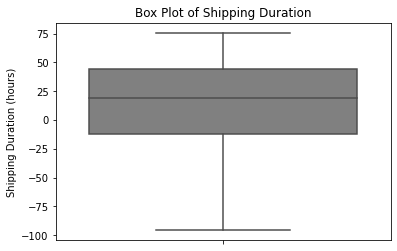

In [13]:
df_clean['preparation_duration'] = pd.to_timedelta(df_clean['preparation_duration'])

df_clean['preparation_duration_hours'] = df_clean['preparation_duration'].dt.total_seconds() / 3600

sns.boxplot(data=df_clean, y='preparation_duration_hours', color='grey')

plt.title('Box Plot of Shipping Duration')
plt.ylabel('Shipping Duration (hours)')
plt.show()

Look for irregularities in the delivery duration column

In [14]:
negative_delivered= df_clean[df_clean['delivery_duration'] < pd.Timedelta(0)]
negative_delivered

,id,order_id,user_id,product_id,inventory_item_id,status,created_at,shipped_at,delivered_at,returned_at,sale_price,preparation_duration,delivery_duration,preparation_duration_hours


> No discrepancies were found in the delivery duration column

Creates a dataframe without `negative shipping_duration`

In [15]:
df_positive_duration = df_clean[(df_clean['preparation_duration'].dt.total_seconds() >= 0) | (df_clean['status'].isin(['Processing', 'Cancelled']) & df_clean['preparation_duration'].isnull())]
df_positive_duration

,id,order_id,user_id,product_id,inventory_item_id,status,created_at,shipped_at,delivered_at,returned_at,sale_price,preparation_duration,delivery_duration,preparation_duration_hours
0,582,393,287,13606,1578,Shipped,2023-02-05 08:08:51+00:00,2023-02-05 21:04:00+00:00,NaT,NaT,2.50,0 days 12:55:09,NaT,12.919167
1,1366,958,770,13606,3722,Complete,2023-04-10 14:38:35+00:00,2023-04-11 23:33:00+00:00,2023-04-13 16:35:00+00:00,NaT,2.50,1 days 08:54:25,1 days 17:02:00,32.906944
2,331,218,152,13606,874,Processing,2023-06-03 23:23:16+00:00,NaT,NaT,NaT,2.50,NaT,NaT,NaN
3,144885,99909,80197,13606,391108,Processing,2023-01-28 10:26:25+00:00,NaT,NaT,NaT,2.50,NaT,NaT,NaN
5,9331,6504,5134,28557,25137,Processing,2023-04-28 12:11:58+00:00,NaT,NaT,NaT,3.25,NaT,NaT,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62511,125239,86455,69452,146,337935,Shipped,2023-02-15 05:43:31+00:00,2023-02-15 23:02:00+00:00,NaT,NaT,9.32,0 days 17:18:29,NaT,17.308056
62512,23655,16492,13006,146,63864,Complete,2023-04-04 04:48:59+00:00,2023-04-04 06:58:00+00:00,2023-04-05 02:20:00+00:00,NaT,9.32,0 days 02:09:01,0 days 19:22:00,2.150278
62513,95919,66298,53125,146,258859,Complete,2023-05-24 04:45:25+00:00,2023-05-26 04:23:00+00:00,2023-05-27 21:11:00+00:00,NaT,9.32,1 days 23:37:35,1 days 16:48:00,47.626389
62514,82243,56855,45478,3633,221966,Returned,2023-04-04 10:49:04+00:00,2023-04-06 05:24:00+00:00,2023-04-07 16:58:00+00:00,2023-04-08 00:38:00+00:00,9.32,1 days 18:34:56,1 days 11:34:00,42.582222


Makes a comparison of the percentage contents of the `status` column

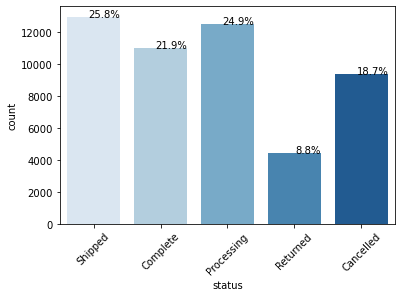

In [16]:
ax = sns.countplot(x="status", data=df_positive_duration, palette="Blues")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

for p in ax.patches:
  percentage = '{:.1f}%'.format(100 * p.get_height()/len(df_positive_duration))
  x = p.get_x() + p.get_width()
  y = p.get_height()
  ax.annotate(percentage, (x, y),ha='right')

> Found `8.8%`, there is a `Returned` status because the goods received are not in accordance with the specifications that have been set or the goods sent are damaged. So the warehouse must first check the returned goods, replace them with more suitable goods.

In [17]:
# Find the mean shipping duration
shipping_duration_mean = df_positive_duration['preparation_duration'].mean()
shipping_duration_mean


Timedelta('1 days 11:00:15.237705784')

Look for orders with a shipping duration above the mean shipping duration

In [18]:
df_above_mean_shipping=df_positive_duration.loc[df_positive_duration['preparation_duration'] > shipping_duration_mean, :]
df_above_mean_shipping

,id,order_id,user_id,product_id,inventory_item_id,status,created_at,shipped_at,delivered_at,returned_at,sale_price,preparation_duration,delivery_duration,preparation_duration_hours
8,137387,94834,76220,15419,370869,Shipped,2023-02-12 09:45:51+00:00,2023-02-14 19:09:00+00:00,NaT,NaT,3.50,2 days 09:23:09,NaT,57.385833
11,90614,62592,50116,28668,244528,Complete,2023-03-04 12:33:58+00:00,2023-03-06 13:17:00+00:00,2023-03-10 02:04:00+00:00,NaT,3.50,2 days 00:43:02,3 days 12:47:00,48.717222
13,147204,101452,81426,28668,397390,Complete,2023-04-13 02:43:17+00:00,2023-04-14 16:09:00+00:00,2023-04-16 05:46:00+00:00,NaT,3.50,1 days 13:25:43,1 days 13:37:00,37.428611
14,69139,47793,38171,13696,186499,Returned,2023-02-16 04:43:56+00:00,2023-02-18 13:14:00+00:00,2023-02-19 14:14:00+00:00,2023-02-22 11:31:00+00:00,3.50,2 days 08:30:04,1 days 01:00:00,56.501111
23,133994,92507,74381,12602,361641,Complete,2023-04-10 15:01:29+00:00,2023-04-12 17:21:00+00:00,2023-04-12 23:36:00+00:00,NaT,3.75,2 days 02:19:31,0 days 06:15:00,50.325278
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62494,39908,27687,21992,13930,107767,Shipped,2023-06-09 16:26:22.941560+00:00,2023-06-11 17:28:09.941560+00:00,NaT,NaT,7.91,2 days 01:01:47,NaT,49.029722
62497,162804,112203,90079,744,439529,Shipped,2023-05-30 12:34:45+00:00,2023-06-01 09:53:00+00:00,NaT,NaT,7.91,1 days 21:18:15,NaT,45.304167
62498,82528,57044,45627,13930,222745,Complete,2023-01-18 16:40:00+00:00,2023-01-21 03:15:00+00:00,2023-01-25 10:50:00+00:00,NaT,7.91,2 days 10:35:00,4 days 07:35:00,58.583333
62513,95919,66298,53125,146,258859,Complete,2023-05-24 04:45:25+00:00,2023-05-26 04:23:00+00:00,2023-05-27 21:11:00+00:00,NaT,9.32,1 days 23:37:35,1 days 16:48:00,47.626389


In [19]:
# looking mean delivery duration
delivery_duration_mean = df_positive_duration['delivery_duration'][~df_positive_duration['delivery_duration'].isna()].mean()
delivery_duration_mean

Timedelta('2 days 11:42:23.348909657')

> Estimated delivery of ordered goods to the hands of customers on average 2 days 11 hours

`The average time it takes a customer to receive the goods from the initial order is 3 days 22 hours or almost 4 days`

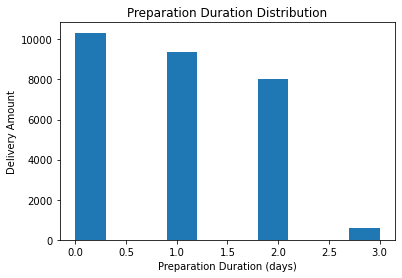

In [20]:
# Visualization of the histogram of shipping duration
plt.hist(df_positive_duration['preparation_duration'].dt.days, bins=10)  
plt.xlabel('Preparation Duration (days)')
plt.ylabel('Delivery Amount')
plt.title('Preparation Duration Distribution')
plt.show()

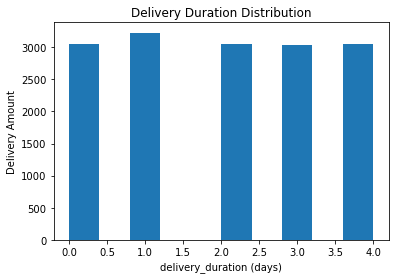

In [21]:
# Visualization of the histogram of delivery duration
plt.hist(df_positive_duration['delivery_duration'].dt.days, bins=10)  
plt.xlabel('delivery_duration (days)')
plt.ylabel('Delivery Amount')
plt.title('Delivery Duration Distribution')
plt.show()


In [22]:
df_positive_duration['preparation_duration'].describe()

count                        28367
mean     1 days 11:00:15.237705784
std      0 days 20:55:30.953452976
min                0 days 00:00:04
25%                0 days 16:55:32
50%                1 days 09:37:50
75%                2 days 04:40:21
max                3 days 03:47:05
Name: preparation_duration, dtype: object

In [23]:
df_positive_duration['delivery_duration'].describe()

count                        15408
mean     2 days 11:42:23.348909657
std      1 days 10:31:49.178354605
min                0 days 00:00:00
25%                1 days 05:54:00
50%                2 days 11:10:00
75%                3 days 17:10:00
max                4 days 23:59:00
Name: delivery_duration, dtype: object

In [24]:
data = df_positive_duration.copy()

In [25]:
subset_data = data[['status', 'preparation_duration']].copy()

subset_data.dropna(subset=['preparation_duration'], inplace=True)

complete_duration = subset_data.loc[subset_data['status'] == 'shipping', 'preparation_duration']
cancelled_duration = subset_data.loc[subset_data['status'] == 'returned', 'preparation_duration']

t_stat, p_value = stats.ttest_ind(complete_duration, cancelled_duration)

alpha = 0.05

print("Analisis Statistik Inferensial:")
print("================================")
print("T-Statistik:", t_stat)
print("P-Value:", p_value)
if p_value < alpha:
    print("The null hypothesis is rejected. There was a significant difference between the Complete and Returned groups.")
else:
    print("There is not enough evidence to reject the null hypothesis. There was no significant difference between the Complete and Returned groups.")


Analisis Statistik Inferensial:
T-Statistik: nan
P-Value: nan
There is not enough evidence to reject the null hypothesis. There was no significant difference between the Complete and Returned groups.


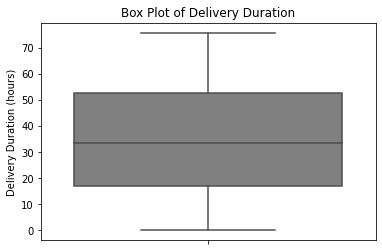

In [26]:
data['preparation_duration'] = pd.to_timedelta(data['preparation_duration'])

data['preparation_duration_hours'] = data['preparation_duration'].dt.total_seconds() / 3600

sns.boxplot(data=data, y='preparation_duration_hours', color='grey')

plt.title('Box Plot of Delivery Duration')
plt.ylabel('Delivery Duration (hours)')
plt.show()


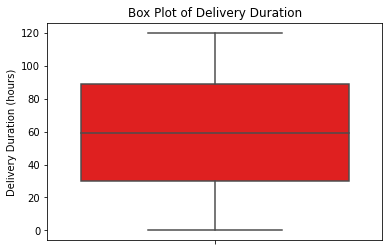

In [27]:
data['delivery_duration'] = pd.to_timedelta(data['delivery_duration'])

data['delivery_duration_hours'] = data['delivery_duration'].dt.total_seconds() / 3600

sns.boxplot(data=data, y='delivery_duration_hours', color='red')

plt.title('Box Plot of Delivery Duration')
plt.ylabel('Delivery Duration (hours)')
plt.show()


In [28]:
cancelled_df =df_positive_duration.loc[df_positive_duration['status'] == 'Cancelled']
cancelled_df

,id,order_id,user_id,product_id,inventory_item_id,status,created_at,shipped_at,delivered_at,returned_at,sale_price,preparation_duration,delivery_duration,preparation_duration_hours
45,64707,44748,35734,16949,174513,Cancelled,2023-05-17 04:22:24+00:00,NaT,NaT,NaT,5.00,NaT,NaT,NaN
46,94806,65525,52513,18719,255852,Cancelled,2023-05-07 09:01:46+00:00,NaT,NaT,NaT,5.00,NaT,NaT,NaN
75,49779,34497,27478,28785,134249,Cancelled,2023-02-24 07:08:54+00:00,NaT,NaT,NaT,6.00,NaT,NaT,NaN
76,79790,55141,44078,9414,215329,Cancelled,2023-03-27 04:49:05+00:00,NaT,NaT,NaT,6.00,NaT,NaT,NaN
77,146910,101260,81270,13616,396592,Cancelled,2023-04-28 02:12:48+00:00,NaT,NaT,NaT,6.00,NaT,NaT,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62490,124754,86125,69192,10298,336634,Cancelled,2023-01-14 08:26:24+00:00,NaT,NaT,NaT,7.16,NaT,NaT,NaN
62505,24147,16817,13266,15592,65182,Cancelled,2023-05-09 11:22:44+00:00,NaT,NaT,NaT,8.32,NaT,NaT,NaN
62506,46753,32404,25818,15592,126113,Cancelled,2023-05-20 08:33:27+00:00,NaT,NaT,NaT,8.32,NaT,NaT,NaN
62507,51775,35869,28612,13798,139624,Cancelled,2023-05-27 22:18:12+00:00,NaT,NaT,NaT,8.32,NaT,NaT,NaN


In [29]:
Processing_df =df_positive_duration.loc[df_positive_duration['status'] == 'Processing']
Processing_df

,id,order_id,user_id,product_id,inventory_item_id,status,created_at,shipped_at,delivered_at,returned_at,sale_price,preparation_duration,delivery_duration,preparation_duration_hours
2,331,218,152,13606,874,Processing,2023-06-03 23:23:16+00:00,NaT,NaT,NaT,2.50,NaT,NaT,NaN
3,144885,99909,80197,13606,391108,Processing,2023-01-28 10:26:25+00:00,NaT,NaT,NaT,2.50,NaT,NaT,NaN
5,9331,6504,5134,28557,25137,Processing,2023-04-28 12:11:58+00:00,NaT,NaT,NaT,3.25,NaT,NaT,NaN
6,10428,7279,5757,28557,28087,Processing,2023-06-07 13:15:19.035546+00:00,NaT,NaT,NaT,3.25,NaT,NaT,NaN
18,29297,20381,16177,14248,79099,Processing,2023-01-22 02:48:10+00:00,NaT,NaT,NaT,3.50,NaT,NaT,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62491,59736,41334,32966,10029,161168,Processing,2023-01-25 11:31:24+00:00,NaT,NaT,NaT,7.16,NaT,NaT,NaN
62492,109634,75705,60720,10029,295847,Processing,2023-05-26 02:35:58+00:00,NaT,NaT,NaT,7.16,NaT,NaT,NaN
62493,160661,110706,88874,6140,433723,Processing,2023-03-09 08:10:16+00:00,NaT,NaT,NaT,7.16,NaT,NaT,NaN
62499,28322,19709,15647,13930,76453,Processing,2023-03-22 11:10:28+00:00,NaT,NaT,NaT,7.91,NaT,NaT,NaN


> Equation of `status` `processing` and `cancelled`, that is, it has not yet entered the input stage to the `shipped_at` column so it is not needed in the calculation of Shipping Performance Review

Creates a dataframe that has arrived at the `shipped_at` loading process

In [30]:
df_result = df_positive_duration.loc[df_positive_duration['status'].isin(['Shipped', 'Complete', 'Returned'])]
df_result

,id,order_id,user_id,product_id,inventory_item_id,status,created_at,shipped_at,delivered_at,returned_at,sale_price,preparation_duration,delivery_duration,preparation_duration_hours
0,582,393,287,13606,1578,Shipped,2023-02-05 08:08:51+00:00,2023-02-05 21:04:00+00:00,NaT,NaT,2.50,0 days 12:55:09,NaT,12.919167
1,1366,958,770,13606,3722,Complete,2023-04-10 14:38:35+00:00,2023-04-11 23:33:00+00:00,2023-04-13 16:35:00+00:00,NaT,2.50,1 days 08:54:25,1 days 17:02:00,32.906944
7,12190,8512,6716,15419,32815,Shipped,2023-02-08 09:29:29+00:00,2023-02-09 14:21:00+00:00,NaT,NaT,3.50,1 days 04:51:31,NaT,28.858611
8,137387,94834,76220,15419,370869,Shipped,2023-02-12 09:45:51+00:00,2023-02-14 19:09:00+00:00,NaT,NaT,3.50,2 days 09:23:09,NaT,57.385833
9,8212,5731,4532,15784,22093,Complete,2023-02-25 11:46:30+00:00,2023-02-26 07:23:00+00:00,2023-02-28 19:52:00+00:00,NaT,3.50,0 days 19:36:30,2 days 12:29:00,19.608333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62510,42887,29749,23652,3633,115754,Shipped,2023-05-28 00:41:26+00:00,2023-05-28 14:34:00+00:00,NaT,NaT,9.32,0 days 13:52:34,NaT,13.876111
62511,125239,86455,69452,146,337935,Shipped,2023-02-15 05:43:31+00:00,2023-02-15 23:02:00+00:00,NaT,NaT,9.32,0 days 17:18:29,NaT,17.308056
62512,23655,16492,13006,146,63864,Complete,2023-04-04 04:48:59+00:00,2023-04-04 06:58:00+00:00,2023-04-05 02:20:00+00:00,NaT,9.32,0 days 02:09:01,0 days 19:22:00,2.150278
62513,95919,66298,53125,146,258859,Complete,2023-05-24 04:45:25+00:00,2023-05-26 04:23:00+00:00,2023-05-27 21:11:00+00:00,NaT,9.32,1 days 23:37:35,1 days 16:48:00,47.626389


Visualize the percentage of the `status` column that has been filtered at least `shipped_at` input

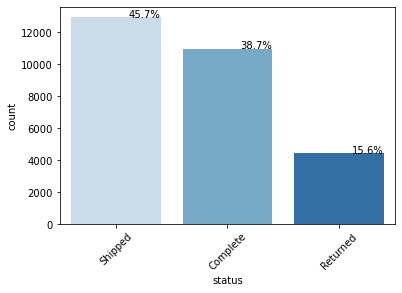

In [31]:
ax = sns.countplot(x="status", data=df_result, palette="Blues")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

for p in ax.patches:
  percentage = '{:.1f}%'.format(100 * p.get_height()/len(df_result))
  x = p.get_x() + p.get_width()
  y = p.get_height()
  ax.annotate(percentage, (x, y),ha='right')

visualization of the comparison of `preparation_duration` bove the mean and below the mean

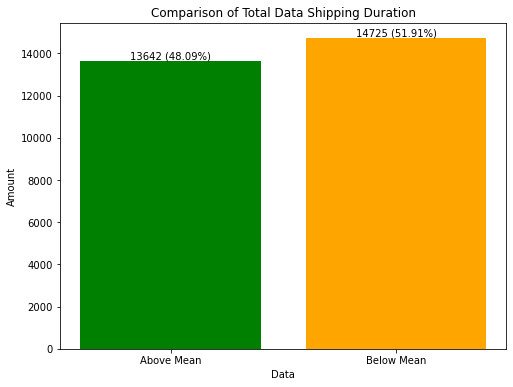

In [32]:

mean_duration = df_result['preparation_duration'].mean().total_seconds() / 3600


above_mean = df_result[df_result['preparation_duration'].dt.total_seconds() / 3600 > mean_duration]
below_mean = df_result[df_result['preparation_duration'].dt.total_seconds() / 3600 <= mean_duration]


count_above_mean = above_mean.shape[0]
count_below_mean = below_mean.shape[0]


percentage_above_mean = (count_above_mean / df_result.shape[0]) * 100
percentage_below_mean = (count_below_mean / df_result.shape[0]) * 100


plt.figure(figsize=(8, 6))
plt.bar(['Above Mean', 'Below Mean'], [count_above_mean, count_below_mean], color=['green', 'orange'])


plt.text(0, count_above_mean, f"{count_above_mean} ({percentage_above_mean:.2f}%)", ha='center', va='bottom')
plt.text(1, count_below_mean, f"{count_below_mean} ({percentage_below_mean:.2f}%)", ha='center', va='bottom')


plt.xlabel('Data')
plt.ylabel('Amount')


plt.title('Comparison of Total Data Shipping Duration')


plt.show()


In [33]:

shipped_completed = df_positive_duration[df_positive_duration['status'].isin(['Shipped', 'Complete'])].shape[0]

shipped_completed_returned = df_positive_duration[df_positive_duration['status'].isin(['Shipped', 'Complete', 'Returned'])].shape[0]

performa_gudang = shipped_completed / shipped_completed_returned

print("KPI Shipping Performance: {:.2%}".format(performa_gudang))


KPI Shipping Performance: 84.38%


## Conclusion
> - The `Shipping_duration` feature has data irregularities of `20%` of the total data. Input may not be according to the procedure

> - Returned status of `15.6%` must be evaluated and followed up because it makes the company lose

> - `48.9%` data duration preparation is longer than the mean preparation duration

> - Mean Shipping Duration : 1 day 11 hours
   Mean Delivery Duration : 2 days 11 hours
   Mean Customer Receives Orders: `3 days 22 hours almost 4 days`
   The system from Created_at to Delivery_at must be evaluated in determining the delivery lead time for customer orders

> - KPI Shipping Performance Review overall `84.38%`